## **Neural Networks Classification**

* If the output can be either 0 or 1, we call it Binary Classification.
* If there can multiple outputs, we call it Multi-class classification.

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
print(tf.__version__)

2.19.0


In [5]:
from sklearn.datasets import make_circles

n_samples =1000
X, y = make_circles(n_samples, noise=0.03,
                               random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [6]:
import pandas as pd

circles = pd.DataFrame(
                      {'X0': X[:, 0], 'X1': X[:, 1], 'label': y}
                      )
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [10]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [5]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4887 - loss: 6.4880   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4608 - loss: 5.8319 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4459 - loss: 5.2480 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4628 - loss: 5.7547 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 4.5436 


## 50% Accuracy
The Model is performing like guessing. Let's improve its accuracy.

In [6]:
model_1.fit(X,y, epochs=200, verbose=0)

In [7]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

* Even after 200 epochs the model is still performing poorly.
* Let's add an extra layer

In [9]:
from re import VERBOSE
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

history_2 = model_2.fit(X, y, epochs=200, verbose=0)

In [ ]:
df_model_2 = pd.DataFrame(history_2.history)
df_model_2.plot()

In [11]:
model_2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 0.6931  


[0.6932729482650757, 0.5]

## Model Results So far

* Even after changing the architecture the model performances didn't improve as expected.

Some best practices for improving model performances.

* Increasing the no of Layers
* Increasing the no of Hidden Units
* Changing the Learning Rate

All these above are Hyperparameters and the practice of finding the right Hyperparameters is called Parametric Tuning.

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1,activation= "sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history_3 = model_3.fit(X, y, epochs=200, verbose=1)

## Plotting the decision Boundary

* In above we set the activation function to "relu" for Hidden Layers
* "sigmoid" for output layer.
* The optimizer was changed to "Adam"
* We also set the Learning Rate = 0.01

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a Keras model predicting on X.
    Works for both binary and multi-class classification.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # Create grid of points
    x_in = np.c_[xx.ravel(), yy.ravel()]

    # Predict probabilities
    y_pred = model.predict(x_in)

    # Binary classification (sigmoid output → shape: (N,1))
    if model.output_shape[-1] == 1:
        print("doing binary classification...")
        probs = y_pred.reshape(xx.shape)                 # probabilities
        y_pred_classes = (y_pred > 0.5).astype(int).reshape(xx.shape)  # class labels

        # Plot filled background by predicted class
        plt.contourf(xx, yy, y_pred_classes, cmap=plt.cm.RdYlBu, alpha=0.6)

        # 👉 Decision boundary line (where probability = 0.5)
        plt.contour(xx, yy, probs, levels=[0.5], colors="black", linewidths=2)

    # Multi-class classification (softmax output → shape: (N,num_classes))
    else:
        print("doing multiclass classification...")
        class_probs = np.max(y_pred, axis=1).reshape(xx.shape)
        y_pred_classes = np.argmax(y_pred, axis=1).reshape(xx.shape)

        plt.contourf(xx, yy, y_pred_classes, cmap=plt.cm.RdYlBu, alpha=0.6)

        # 👉 Draw contours for decision regions between classes
        plt.contour(xx, yy, y_pred_classes, levels=np.arange(model.output_shape[-1]),
                    colors="black", linewidths=1, alpha=0.8)

    # Plot training data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, edgecolors="k")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()





1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step
doing binary classification...


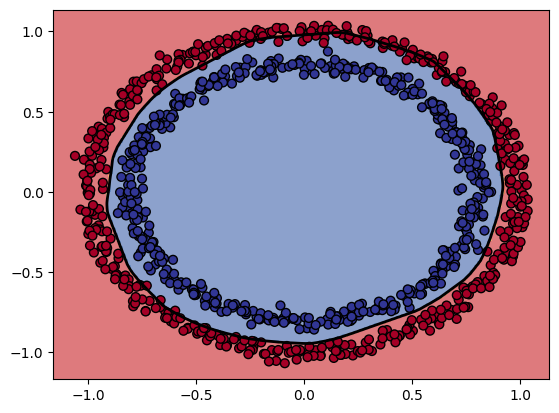

In [30]:
plot_decision_boundary(model_3, X, y)

## Finding the Best Learning Rate

* The most important hyperparameter you can tune for your neural network models
* Learning Rate Callback:- An extra piece of functionality you can add to your model while its training

In [10]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(
                loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer="Adam",
                metrics = ["accuracy"]
                )
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))

history_model_4 = model_4.fit(X, y,
                              epochs=100,
                              verbose=0,
                              callbacks=[lr_scheduler])



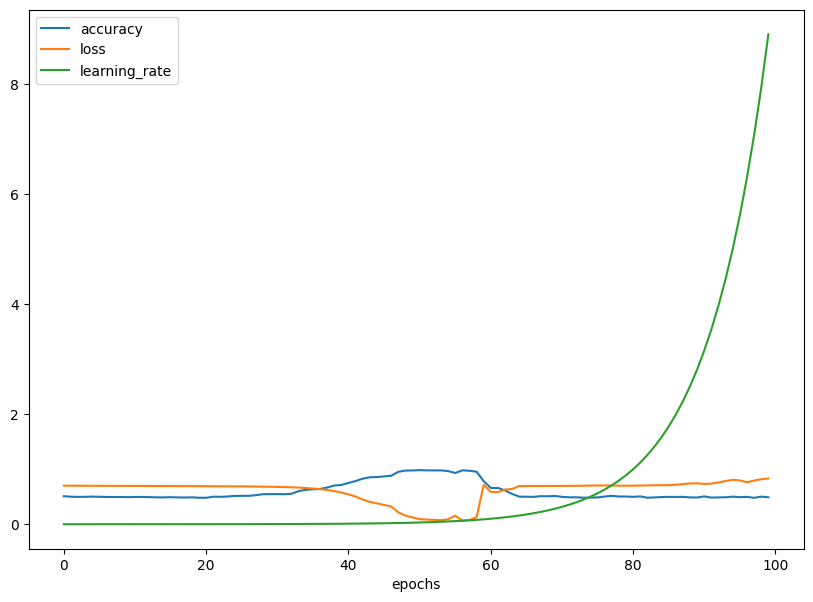

In [12]:
pd.DataFrame(history_model_4.history).plot(figsize=(10,7), xlabel="epochs")
plt.show()

## Point of Inflication
* We need to find the point where the loss in minimal.

Text(0.5, 1.0, 'Learning Rate vs Loss')

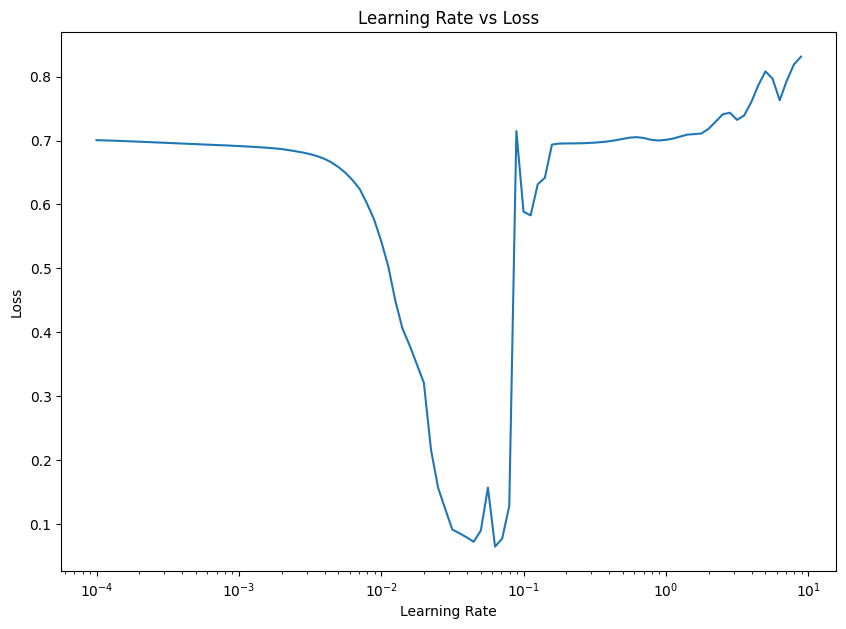

In [13]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_model_4.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")


## Optimal Learning Rate

From the above graph we can easily find that the optimal learning rate is 0.02

In [14]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(
                loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=["accuracy"]
                )
history_model_5 = model_5.fit(X, y, epochs=20, verbose=0)



In [15]:
model_5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9841 - loss: 0.0534


[0.05002206191420555, 0.9850000143051147]

Even After Twenty EPOCHS the model is achieving the accuracy of 98%

## More Evaluation Methods

* **Accuracy:-** Out of 100 predictions, how many does your model get correct?
For Example 95% accuracy means that 95 were correct out of 100.
**Sklearn and Keras Accuracy Metrics**
sklearn.metrics.accuracy_score()
tf.keras.metrics.Accuracy()

* **Precision:-** Suppose you have an algorithm that predicts wither a mail is spam or not. Precision is "Of all the emails the model marked as spam, how many were actually spam?"
Precision = TP/TP + False Positives
So,when your model predicts positive, how often is it right.
For e.g:
* If you have 100 emails and the model predicts 20 as spam.
* Out of these 20, 15 are actually spam (True Positives) while 5 are incorrectly flagged as spam.
Precision = 15/ (15 + 5) = 0.75 = (75%)
So,
**When my Model says spam, it is 75% of the times correct**

**Scikit-learn and Keras Metrics**
sklearn.metrics.precision_score()
tf.keras.metrics.Precision()

* **Recall:-** Taking the same example of Spam Filter. Recall Says, "Of all the actual spam emails, how many did my model correctly catch as spam?"
Recall = TP/TP + FN
* Suppose we have 100 emails out of which 30 are actual spam emails.
* The model catches 20 spam emails correctly (TP=20) but it misses 10 spam emails (FN=10). So,
Recall = 20/20+10 = 67%
It can be summarized as
"When there was spam, my model caught it 67% of the time."
**Scikit-learn and Keras Metrics**
 sklearn.metrics.recall_score()
 tf.keras.metrics.Recall()


***Precision Vs Recall***
* Precision:- "When I say YES, am i correct?"
* Recall:- "Did i catch all the YES cases?"

**F1-score:-** It combines Precision and Recall into one metrics. 1 is best, 0 is worst
F1 = 2 x Precision x Recall/Precision + Recall
***Sklearn F1 Score***
sklearn.metrics.f1_score()

**Confusion Matrix:-** Compares the Predicted Values with the True values in a Tabular way, if 100% correct, all values in the matrix will be top left to bottom right (Diagnol Line).
sklearn.metrics.plot_confusion_matrix()

**Classification Report:-** Collection of some of the main classification metrics such as Precision, Recall and F1-score.
sklearn.metrics.classification_report()


In [16]:
loss, accuracy = model_5.evaluate(X,y)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Loss: {loss:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9841 - loss: 0.0534
Accuracy: 98.50%
Loss: 0.05


## Working with a larger example (multi-class Classification)

* In Binary Classification we have two classes to predict from.
* In Multi-Class Classification we have more than one class to predict from

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(f"Training Sample: \n{train_data[0]}\n")
print(f"Training Label: {train_labels[0]}")

Training Sample: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [2]:
# Shape of Training and Test data
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

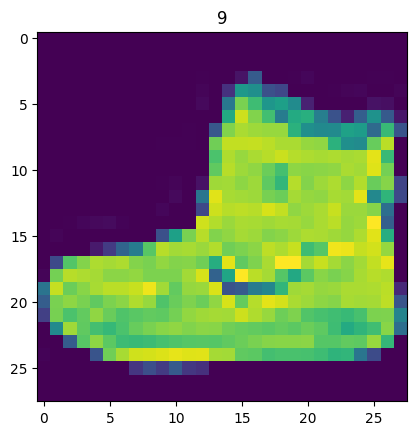

In [5]:
plt.imshow(train_data[0])
# Make the plot title same as train_label
plt.title(train_labels[0])
plt.show()

In [11]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Create Class names for human understanding.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

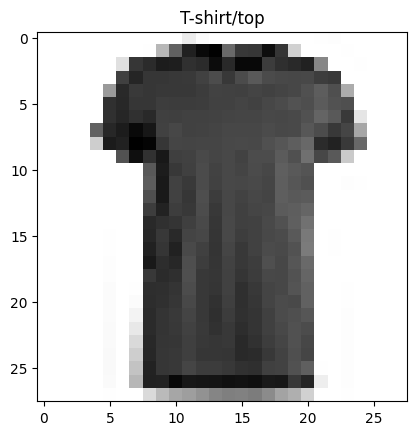

In [7]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])
plt.show()

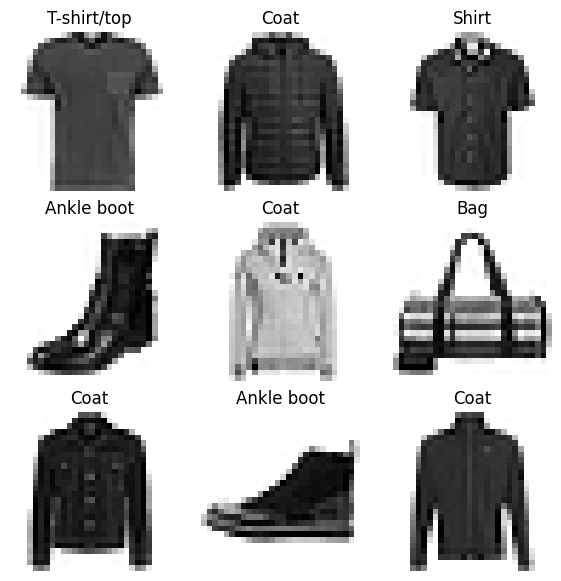

In [8]:
import random

plt.figure(figsize=(7,7))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    random_index = random.randint(0, len(train_data)-1)
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_index]])
    plt.axis("off")

## Changes for Image data
Hence, this is a multi-class classification problem we need to make some adjustments.

* Input Shape:- The input will be a 28*28 tensor. We will have to squash it to (28*28=784).
* Output Shape:- Hence, we have 10 different classes, we need our model to predict for 10 different classes.
* Activation Function:- Our activation function will be softmax which outputs the probability of all classes and we choose the one having high probability.

* Our labels are in integer form so we will use tf.keras.losses.SparseCategoricalCrossentropy(). If our labels were one-hot encoded then we would use tf.keras.losses.CategoricalCrossentropy()
* We will also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model is performing.

* SparseCategoricalCrossentropy: Used when we have more than one output like 10 outputs. For each class a probability is predicted and based on the highest probability the label is predicted.
* CategoricalCrossentropy: It requires one hot coded vector.










In [9]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

non_norm_history = model_6.fit(train_data, train_labels, epochs=10,
                               validation_data=(test_data, test_labels))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.0971 - loss: 3.6455 - val_accuracy: 0.1000 - val_loss: 2.3025
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0984 - loss: 2.3034 - val_accuracy: 0.1000 - val_loss: 2.3022
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0991 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.0987 - loss: 2.3027 -

In [18]:
model_6.evaluate(test_data, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0978 - loss: 2.3027


[2.3027267456054688, 0.10000000149011612]

## Results so far
* Out model accuracy is very less.
* Neural Networks perform better when the values are between 0 and 1.
* For the case above we need to normalize the data.

In [10]:
# Normalize the input

train_data = train_data/255.0
test_data = test_data/255.0

In [11]:
train_data.min(), train_data.max()

(np.float64(0.0), np.float64(1.0))

In [12]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
norm_history = model_7.fit(train_data, train_labels, epochs=10,
                           validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4396 - loss: 1.5365 - val_accuracy: 0.6890 - val_loss: 0.7968
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7117 - loss: 0.7373 - val_accuracy: 0.7373 - val_loss: 0.6788
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7551 - loss: 0.6370 - val_accuracy: 0.7520 - val_loss: 0.6374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7683 - loss: 0.6007 - val_accuracy: 0.7569 - val_loss: 0.6271
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7745 - loss: 0.5860 - val_accuracy: 0.7574 - val_loss: 0.6284
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7783 - loss: 0.5762 - val_accuracy: 0.7619 - val_loss: 0.6123
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7814 - loss: 0.5689 - val_accuracy: 0.7653 - val_loss: 0.6056
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7830 - loss: 0.5626 -

## After Data Normalization
The accuracy has greatly improved to 0.82, and validation accuracy is also 0.81, very close so we can easily infer that model is not overfitting.

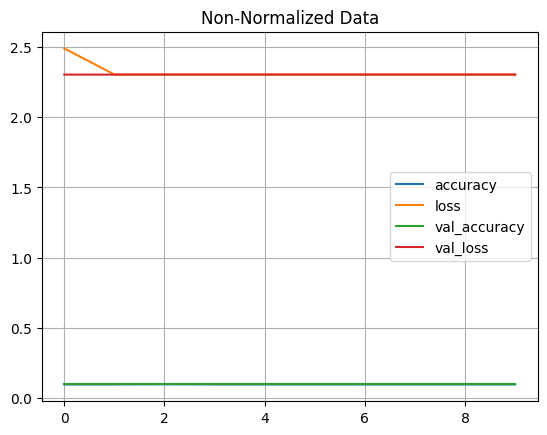

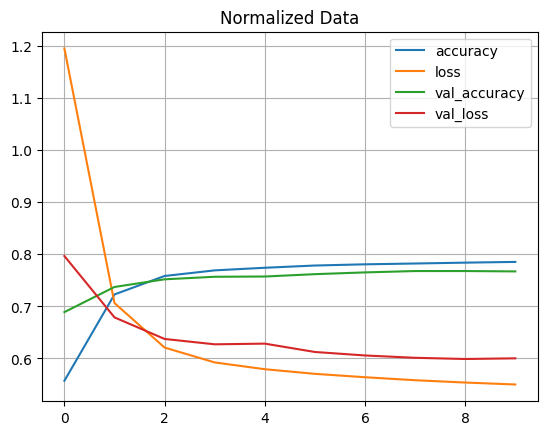

In [13]:
import pandas as pd

pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")
# Make a grid lines in the chart
plt.grid()
plt.show()
pd.DataFrame(norm_history.history).plot(title="Normalized Data")
plt.grid()
plt.show()

## Adding the Learning Rate

In [15]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


'''
Learning rate
This changes LearningRate at each epoch.
Callback is a function which changes the value before the start of
each epoch.
Ie-3=0.001 is the learning rate.
10**(epoch/20): It increases the learning rate exponentially by
a factor of 10.
Epoch 0 --> 0.001 X 10 raise to the power (0/20)=0.001
Epoch 20 ---> 0.01
Epoch 40 ---> 0.1
'''
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(
                                             lambda epoch:1e-3*10**(epoch/20))

# Learning Rate History
find_lr_history = model_8.fit(train_data, train_labels, epochs=100,
                              validation_data = (test_data, test_labels),
                              verbose=0,
                              callbacks=[lr_scheduler])




/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


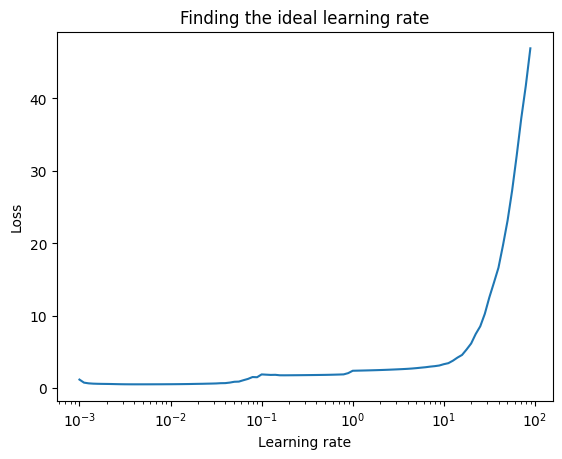

In [17]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(100)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

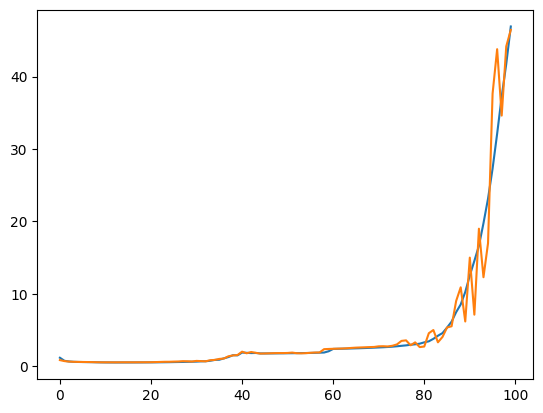

In [22]:
df = pd.DataFrame(find_lr_history.history)
df["loss"].plot()
df["val_loss"].plot()
plt.show()

## Ideal Learning Rate is 0.001

Let's run the model with the ideal learning rate

In [23]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_9.fit(train_data,
            train_labels,
            epochs=20,
            validation_data=(test_data, test_labels))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5391 - loss: 1.2456 - val_accuracy: 0.7522 - val_loss: 0.6691
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7733 - loss: 0.6380 - val_accuracy: 0.7770 - val_loss: 0.6178
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7868 - loss: 0.5988 - val_accuracy: 0.7831 - val_loss: 0.5975
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7929 - loss: 0.5800 - val_accuracy: 0.7910 - val_loss: 0.5851
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7990 - loss: 0.5670 - val_accuracy: 0.7960 - val_loss: 0.5746
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8034 - loss: 0.5553 - val_accuracy: 0.7996 - val_loss: 0.5671
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8073 - loss: 0.5457 - val_accuracy: 0.8019 - val_loss: 0.5616
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8109 - loss: 0.5378 -

## Evaluating the Model

Now that our model has finished training on the new Learning Rate, let's evaluate it.

* We can evaluate it's performance
using classification metrics such as Confusion Matrix or Classification Report.
* Assess some of its predictions through visulaization
* Imporve it's accuracy ( by training it for longer or changing the architecture)
* Save and Export it for use in an application.












In [26]:
y_pred = model_9.predict(test_data)
y_pred[:2]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.1419584e-09, 1.7223122e-11, 1.3952799e-10, 1.7296571e-07,
        1.0356361e-11, 1.7803077e-01, 2.4953324e-11, 1.4830339e-01,
        4.8467882e-06, 6.7366093e-01],
       [1.9286254e-04, 8.1565662e-13, 9.6544963e-01, 3.3783912e-05,
        3.2249135e-03, 5.7630468e-32, 2.7741022e-02, 1.6226518e-36,
        3.3578437e-03, 0.0000000e+00]], dtype=float32)

In [28]:
y_pred[0].argmax(), class_names[y_pred[0].argmax()]

(np.int64(9), 'Ankle boot')

## Output is probabilities for 10 classes

We need to use the argmax() function to get the highest probability item.

In [41]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=6):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [31]:
# Converting probabilities to Numbers
# axis =1 means find the largest element row wise

y_pred_no = y_pred.argmax(axis=1)
y_pred_no[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [34]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_labels, y_pred_no))

[[709   6  20  79   5   3 157   0  21   0]
 [  1 950   0  27  12   0   8   0   2   0]
 [ 12   2 720  14 134   0 100   0  18   0]
 [ 24  19  15 846  41   3  33   0  19   0]
 [  0   2 135  39 747   0  71   0   6   0]
 [  1   0   0   0   0 921   0  38  10  30]
 [133   4 177  53 108   2 486   1  35   1]
 [  0   0   0   0   0  53   0 912   1  34]
 [  5   2  30  13   2  12   7   8 921   0]
 [  0   0   0   2   0  29   0  51   1 917]]


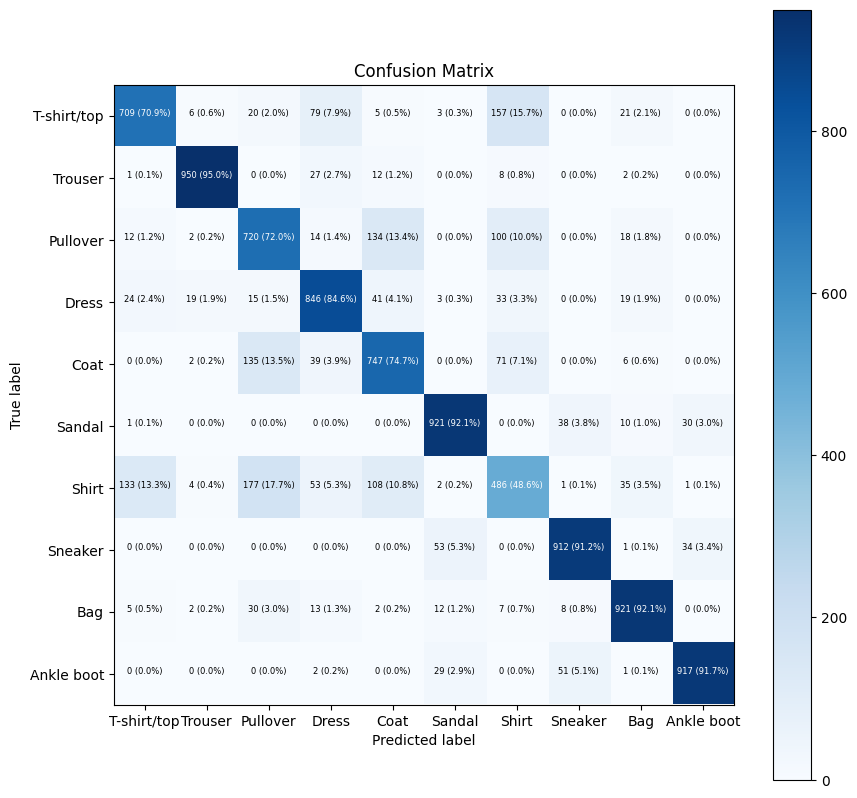

In [42]:
make_confusion_matrix(y_true=test_labels, y_pred=y_pred_no, classes=class_names)

In [43]:
import random
import matplotlib.pyplot as plt
def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = class_names[pred_probs.argmax()]
  true_label = class_names[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)
  plt.show()






1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


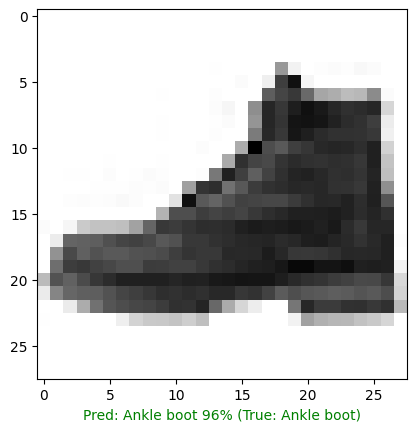

In [46]:
'''
pass the desired model, images, true labels and classes
'''

plot_random_image(model=model_9,
                  images= test_data,
                  true_labels=test_labels,
                  classes = class_names)

## What patterns is our model learning

In [47]:
model_9.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_9, built=True>,
 <Dense name=dense_10, built=True>,
 <Dense name=dense_11, built=True>]

In [48]:
model_9.layers[1]

<Dense name=dense_9, built=True>

In [52]:
# Get weights of the model
weights , biases = model_9.layers[1].get_weights()
weights, biases

(array([[ 0.57822394,  0.6031548 , -1.0149009 ,  0.51699233],
        [-1.1479226 ,  0.5807376 , -0.17516576,  0.9364507 ],
        [-0.04628584,  0.9046848 , -1.1615189 ,  0.02198999],
        ...,
        [-0.35584402, -0.13226424,  0.13905974,  0.7917295 ],
        [-0.20366387, -0.30421698, -0.9237396 ,  1.1262329 ],
        [ 0.13992843,  0.41301456, -0.86500376,  1.2916056 ]],
       dtype=float32),
 array([0.76069313, 0.4510617 , 1.0123208 , 0.40853515], dtype=float32))

In [53]:
weights.shape

(784, 4)

## Weights Initialization

* We get a weight matrix
* Each value in the weight matrix corresponds to a particular value that influences the network decision
* The weight values are set using **kernel_initializer**. The default is **glorot_uniform** and these values are updated during training to make neural network perform in a specific way as desired.

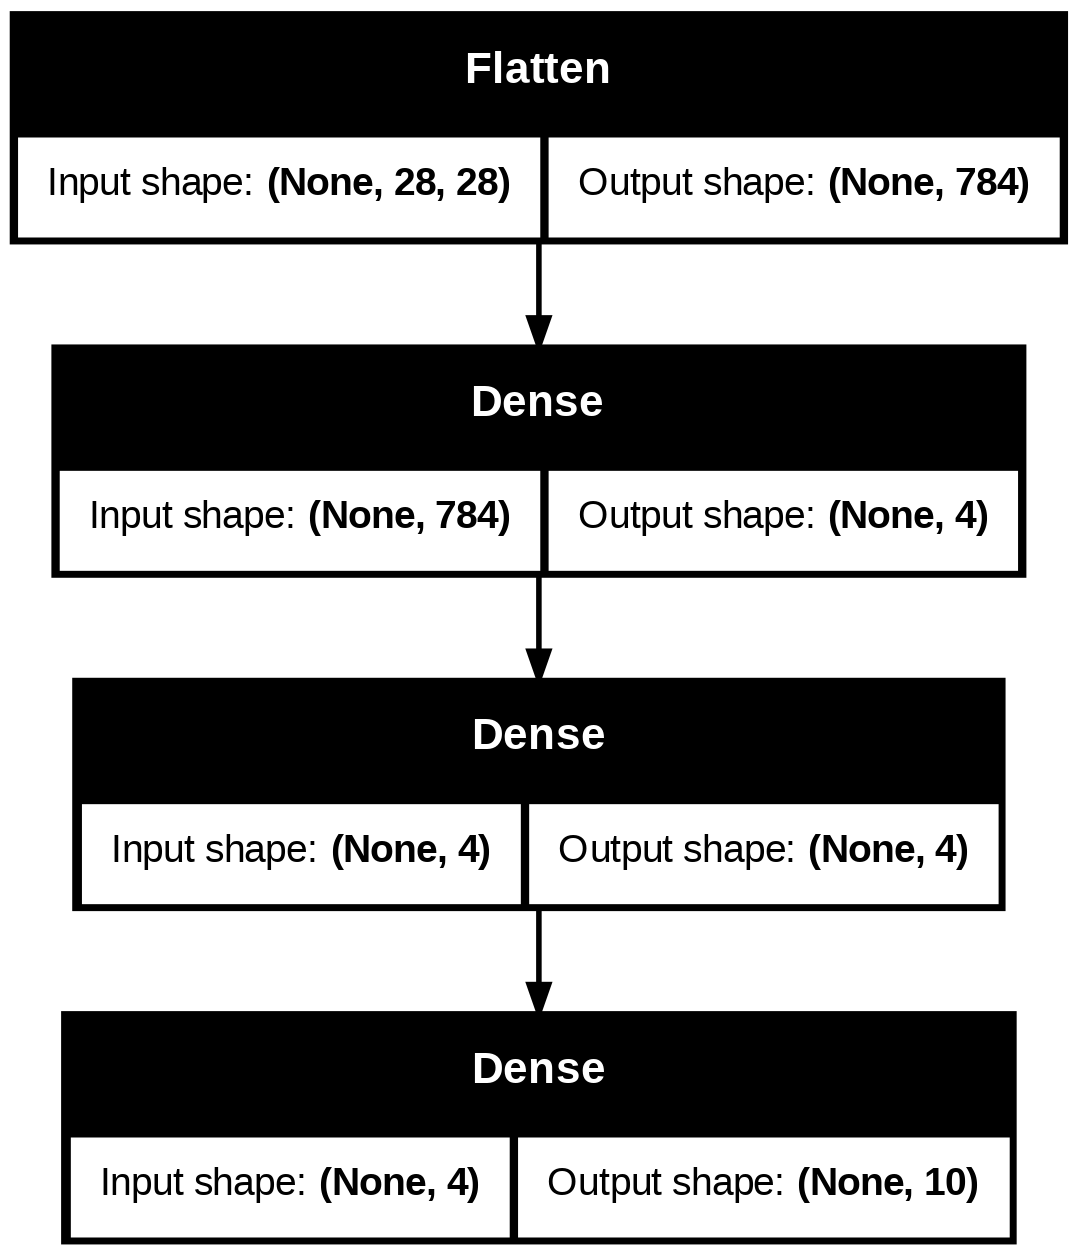

In [55]:
from tensorflow.keras.utils import plot_model
plot_model(model_9, show_shapes=True)